In [4]:
# Importation of  the packages used in this project
# You can do this all now or as you need them

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# read the excel data
df = pd.read_csv('C:/Users/parvel.sigauke/Documents/my_projects/portfolio/python/movies.csv')

In [5]:
#let's look at the data

df.head()
a = len(df)
print(a)

7668


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


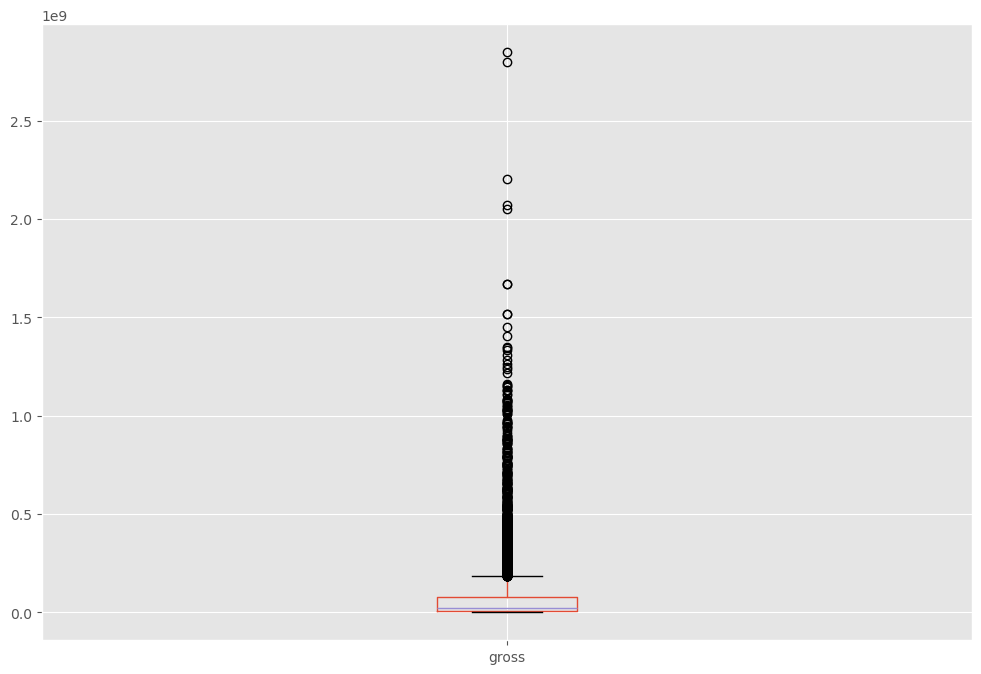

In [8]:
# Checking Outliers

df.boxplot(column=['gross'])


# missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%' .format(col, pct_missing))

#There is missing data in the dataset

In [10]:
#removing missing values
data = df.dropna()


In [12]:
#data types of our columns
data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [14]:
# Change data type of columns
data['budget']=data['budget'].astype('int64')
data['gross']=data['gross'].astype('int64')

In [16]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [18]:
#Create the correct year column
data['yearcorrect'] = data['released'].str.extract(pat = '([0-9]{4})').astype(int)
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [22]:
data_sort=data.sort_values(by=['gross'], inplace=False, ascending=False)
data_sort.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [24]:
#Show the whole dataset
pd.set_option('display.max_rows', None)

In [26]:
#drop any duplicates
data.drop_duplicates()
c= len(data)
c
#There are no duplicates


5421

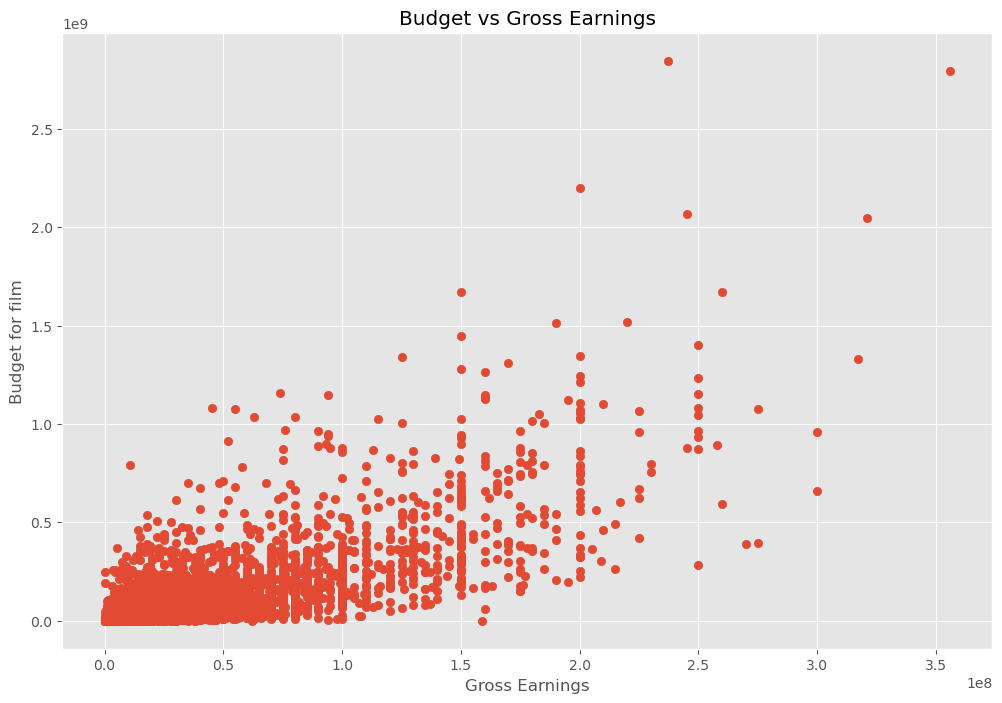

In [28]:
#Scatter plot with budget vs gross
plt.scatter(x=data['budget'], y=data['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for film')
plt.show()

Text(0.5, 1.0, 'Budget vs Gross Earnings')

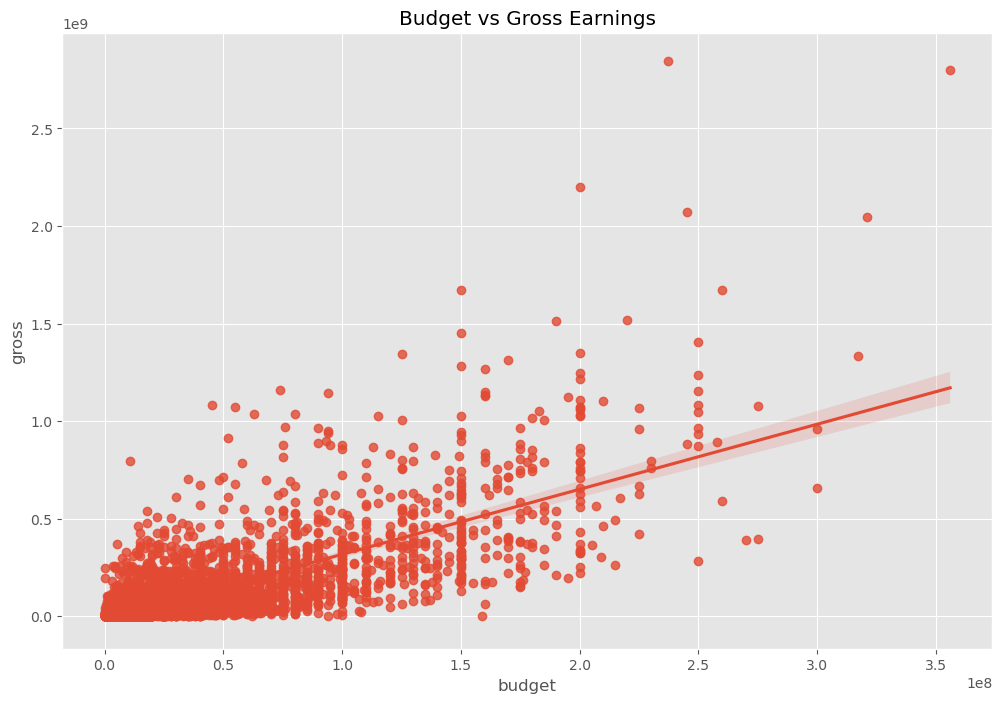

In [30]:
# plot the budget vs gross using seaborn
sns.regplot(x ='budget', y='gross' , data = data)
plt.title('Budget vs Gross Earnings')
#positive correlated

In [32]:
#Correlation of numeric variables
data.corr(numeric_only=True) 

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


In [34]:
data[['year','score','votes','budget', 'gross', 'runtime', 'yearcorrect']].corr(method='pearson')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


In [36]:
data[['year','score','votes','budget', 'gross', 'runtime', 'yearcorrect']].corr(method='kendall')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824,0.991304
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254,0.043400
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344,0.293044
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278,0.213719
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979,0.232372
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000,0.064793
yearcorrect,0.991304,0.043400,0.293044,0.213719,0.232372,0.064793,1.000000


In [38]:
data[['year','score','votes','budget', 'gross', 'runtime', 'yearcorrect']].corr(method='spearman')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444,0.998694
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155,0.063674
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621,0.422988
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794,0.302535
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400,0.340529
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000,0.095507
yearcorrect,0.998694,0.063674,0.422988,0.302535,0.340529,0.095507,1.000000


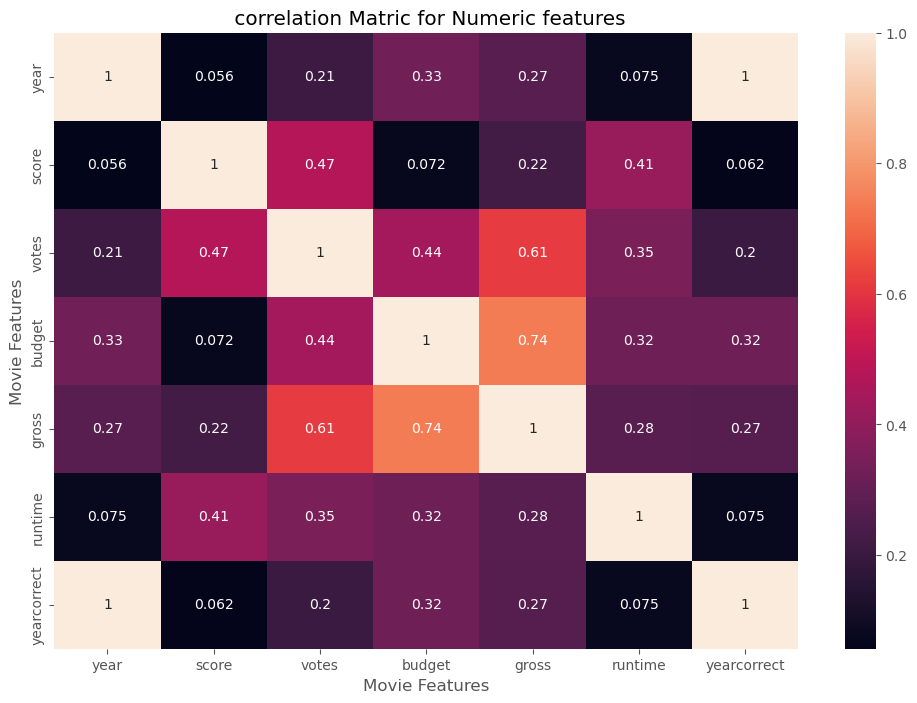

In [40]:
Cor_matrix = data[['year','score','votes','budget', 'gross', 'runtime', 'yearcorrect']].corr(method='pearson')
sns.heatmap( Cor_matrix, annot = True)
plt.title(' correlation Matric for Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [42]:
#Using factorize - this assigns a random numeric value for each unique categorical value
data_numerized =data.apply(lambda x:x. factorize()[0]).corr(method = 'pearson')
data_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,0.169808,0.028413,0.965461,0.966086,-0.020083,0.297305,0.725411,0.791872,0.695124,0.098110,0.288955,0.967925,0.535369,0.048980,0.921688
rating,0.169808,1.000000,-0.116507,0.179456,0.171063,0.036114,0.097619,0.096014,0.128909,0.115694,-0.004547,0.203698,0.172703,-0.026286,0.032265,0.169681
genre,0.028413,-0.116507,1.000000,0.031765,0.031251,-0.027402,-0.009983,0.036671,0.033975,0.045497,-0.003314,0.020893,0.032033,0.015127,0.000056,0.031669
year,0.965461,0.179456,0.031765,1.000000,0.996490,-0.014594,0.323916,0.747785,0.812386,0.719373,0.095073,0.319135,0.996371,0.537731,0.055864,0.950610
released,0.966086,0.171063,0.031251,0.996490,1.000000,-0.019486,0.313254,0.750825,0.809858,0.720076,0.096807,0.309616,0.998490,0.546033,0.049650,0.945065
score,-0.020083,0.036114,-0.027402,-0.014594,-0.019486,1.000000,-0.041981,-0.006583,-0.021538,0.015108,0.016567,-0.005493,-0.015744,-0.008555,0.011831,-0.012946
votes,0.297305,0.097619,-0.009983,0.323916,0.313254,-0.041981,1.000000,0.187909,0.225105,0.182043,-0.021562,0.359065,0.307248,0.007423,0.126362,0.316065
director,0.725411,0.096014,0.036671,0.747785,0.750825,-0.006583,0.187909,1.000000,0.717990,0.636705,0.095349,0.124051,0.751737,0.483737,-0.026918,0.708189
writer,0.791872,0.128909,0.033975,0.812386,0.809858,-0.021538,0.225105,0.717990,1.000000,0.626647,0.098623,0.208088,0.811356,0.477503,0.023123,0.779672
star,0.695124,0.115694,0.045497,0.719373,0.720076,0.015108,0.182043,0.636705,0.626647,1.000000,0.098071,0.138015,0.720811,0.442307,0.033297,0.684736


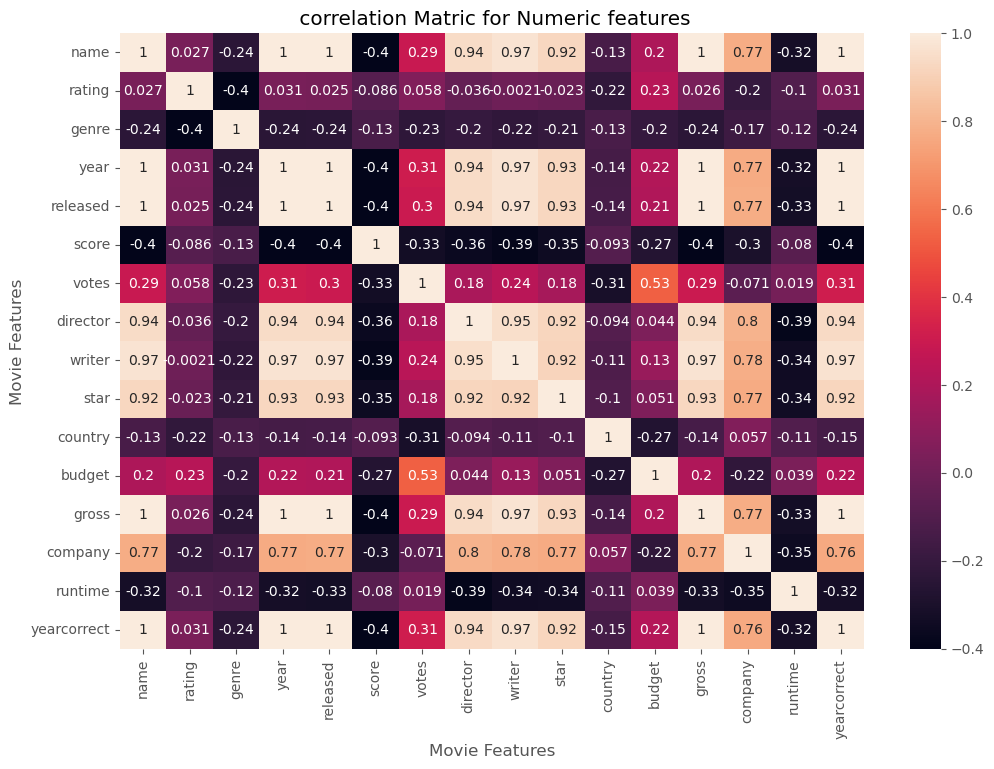

In [44]:
Corr_matrix1 = data_numerized.corr(method='pearson')
sns.heatmap( Corr_matrix1, annot = True)
plt.title(' correlation Matric for Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [46]:
simple_read_corr = data_numerized.corr()
corr_pairs = simple_read_corr.unstack()
corr_pairs

name         name           1.000000
             rating         0.027375
             genre         -0.241505
             year           0.999044
             released       0.999180
             score         -0.399344
             votes          0.291614
             director       0.940866
             writer         0.969480
             star           0.924877
             country       -0.134475
             budget         0.199760
             gross          0.999239
             company        0.774990
             runtime       -0.324490
             yearcorrect    0.996852
rating       name           0.027375
             rating         1.000000
             genre         -0.399689
             year           0.030842
             released       0.025483
             score         -0.086113
             votes          0.058261
             director      -0.036221
             writer        -0.002122
             star          -0.022996
             country       -0.220333
 

In [48]:
pairs_sorted = corr_pairs.sort_values()
print(pairs_sorted)

year         score         -0.401198
score        year          -0.401198
released     score         -0.401146
score        released      -0.401146
genre        rating        -0.399689
rating       genre         -0.399689
score        name          -0.399344
name         score         -0.399344
gross        score         -0.397954
score        gross         -0.397954
yearcorrect  score         -0.397809
score        yearcorrect   -0.397809
             writer        -0.389902
writer       score         -0.389902
runtime      director      -0.388420
director     runtime       -0.388420
             score         -0.358751
score        director      -0.358751
company      runtime       -0.348076
runtime      company       -0.348076
star         score         -0.347456
score        star          -0.347456
runtime      writer        -0.344720
writer       runtime       -0.344720
runtime      star          -0.338915
star         runtime       -0.338915
score        votes         -0.333668
v

In [50]:
high_corr = pairs_sorted[(pairs_sorted)> 0.5]
high_corr

votes        budget         0.533017
budget       votes          0.533017
yearcorrect  company        0.759681
company      yearcorrect    0.759681
star         company        0.765114
company      star           0.765114
year         company        0.766792
company      year           0.766792
             released       0.773038
released     company        0.773038
company      gross          0.773887
gross        company        0.773887
company      name           0.774990
name         company        0.774990
writer       company        0.776065
company      writer         0.776065
             director       0.795143
director     company        0.795143
star         writer         0.915608
writer       star           0.915608
director     star           0.921095
star         director       0.921095
yearcorrect  star           0.921170
star         yearcorrect    0.921170
name         star           0.924877
star         name           0.924877
             year           0.926011
y

In [52]:
# There is a correlation between company and year to gross earnings
